In [1]:
import numpy as np
import pandas as pd

In [2]:
#loading the dataset
data = pd.read_csv('Restaurant_Reviews.csv')

### Exploring dataset


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [4]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


###  Data preprocessing

In [5]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Error loading stopwords: <urlopen error [WinError 10061]
[nltk_data]     No connection could be made because the target machine
[nltk_data]     actively refused it>


In [6]:
#defining a function for data cleaning
corpus =[]
for i in range(0,1000):
#cleaning special charecter from the reviews
    review = re.sub(pattern='[^a-zA-Z]',repl=' ',string=data['Review'][i])
    
    #converting the review to lowercase
    review = review.lower()
    
    #tokenizing the review by words
    review_words = review.split()
    
    #removing the stopwords
    review_words = [word for word in review_words if not word in set(stopwords.words('english'))]
    
    #stemming the words
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review_words]
    
    #joining the stemmed words
    review = ' '.join(review)
    
    #creating a corpus
    corpus.append(review)

In [7]:
corpus[:]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

###  Feature extraction

In [8]:
# Converting text data into numbers
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1500)
X = tfidf_vectorizer.fit_transform(corpus).toarray()
y = data.iloc[:,1].values

### Splitting data

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


###  Model Training

In [10]:
from sklearn.linear_model import LogisticRegression

# Initializing the SVM classifier
lr_classifier = LogisticRegression(max_iter=1000)

# Training the SVM classifier on the training data
lr_classifier.fit(X_train, y_train)



LogisticRegression(max_iter=1000)

In [11]:
#predicting the test set results
y_pred = lr_classifier.predict(X_test)

y_pred

array([0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1], dtype=int64)

###  Model Evaluation

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3 = recall_score(y_test,y_pred)

print("!!!!!!--------SCores--------!!!!!!!")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}%".format(round(score2*100,2)))
print("Recall score is: {}%".format(round(score3*100,2)))


!!!!!!--------SCores--------!!!!!!!
Accuracy score is: 73.0%
Precision score is: 81.25%
Recall score is: 62.5%


In [13]:
#making the confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

In [14]:
cm

array([[81, 15],
       [39, 65]], dtype=int64)

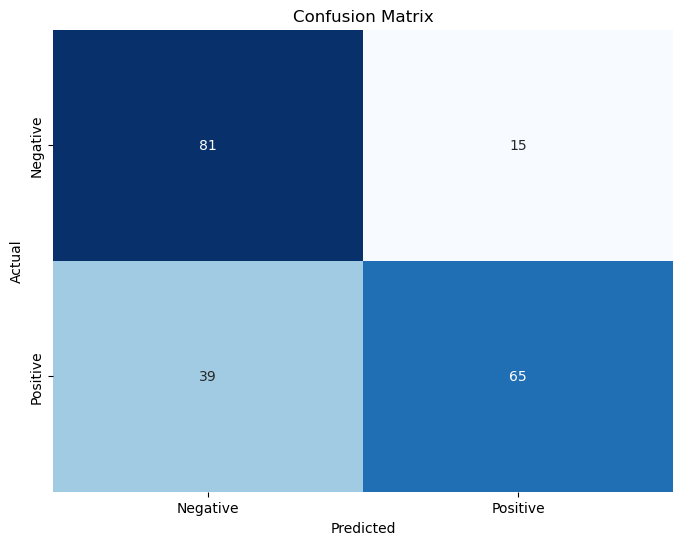

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [16]:

# Defining a range of 'C' values to search
C_values = [0.001, 0.01, 0.1, 1, 10,30,35,45,60,90, 100]  
# Initializing a dictionary to store results
results = {}

# Loop through different 'C' values
for C in C_values:
    # Initializing the Logistic Regression classifier with the current 'C' value
    lr_classifier = LogisticRegression(C=C, max_iter=1000)
    
    # Training the Logistic Regression classifier on the training data
    lr_classifier.fit(X_train, y_train)
    
    # Predicting sentiment labels for the test set
    y_pred_lr = lr_classifier.predict(X_test)
    
    # Calculating the accuracy score for the current 'C' value
    accuracy_lr = accuracy_score(y_test, y_pred_lr)
    
    # Storing the accuracy score in the results dictionary
    results[C] = accuracy_lr
    


#Find the 'C' value with the highest accuracy
best_C = max(results, key=results.get)
best_accuracy = results[best_C]

print("Results for Different 'C' Values:")
for C, accuracy in results.items():
    print(f"C = {C}: Accuracy = {round(accuracy*100,2)}")
    
print("---------------------------------------------------")


print(f"Best Accuracy is:{best_accuracy} with C value as {best_C}" )



Results for Different 'C' Values:
C = 0.001: Accuracy = 48.0
C = 0.01: Accuracy = 58.0
C = 0.1: Accuracy = 68.0
C = 1: Accuracy = 73.0
C = 10: Accuracy = 74.5
C = 30: Accuracy = 74.5
C = 35: Accuracy = 74.5
C = 45: Accuracy = 73.5
C = 60: Accuracy = 74.0
C = 90: Accuracy = 72.5
C = 100: Accuracy = 72.5
---------------------------------------------------
Best Accuracy is:0.745 with C value as 10


In [17]:
best_lr_classifier = LogisticRegression(C=10, max_iter=1000)
best_lr_classifier.fit(X_train, y_train)


LogisticRegression(C=10, max_iter=1000)

###  Testing the model


In [18]:
def predict_sentiment(sample_review):
    sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ',string = sample_review)
    
    #converting the review to lowercase
    sample_review = sample_review.lower()
    
    #tokenizing the review by words
    sample_review_words = sample_review.split()
    
    #removing the stopwords
    sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
    
    #stemming the words
    ps = PorterStemmer()
    final_review = [ps.stem(word) for word in sample_review_words]
    
    #joining the stemmed words
    final_review = ' '.join(final_review)
    
    temp = tfidf_vectorizer.transform([final_review]).toarray()
    return best_lr_classifier.predict(temp)

In [19]:
# predicting values
sample_review = 'the food was really bad.'

if predict_sentiment(sample_review):
    print('this is a POSITIVE review')
else:
    print('this is a NEGATIVE review')

this is a NEGATIVE review


In [20]:
# predicting values
sample_review = 'the food was good and also well maintained.'

if predict_sentiment(sample_review):
    print('this is a POSITIVE review')
else:
    print('this is a NEGATIVE review')

this is a POSITIVE review
